In [57]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv("games.csv")
data.head()


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


Text(0.5, 1.0, 'Average Rating of Games Based on Genre')

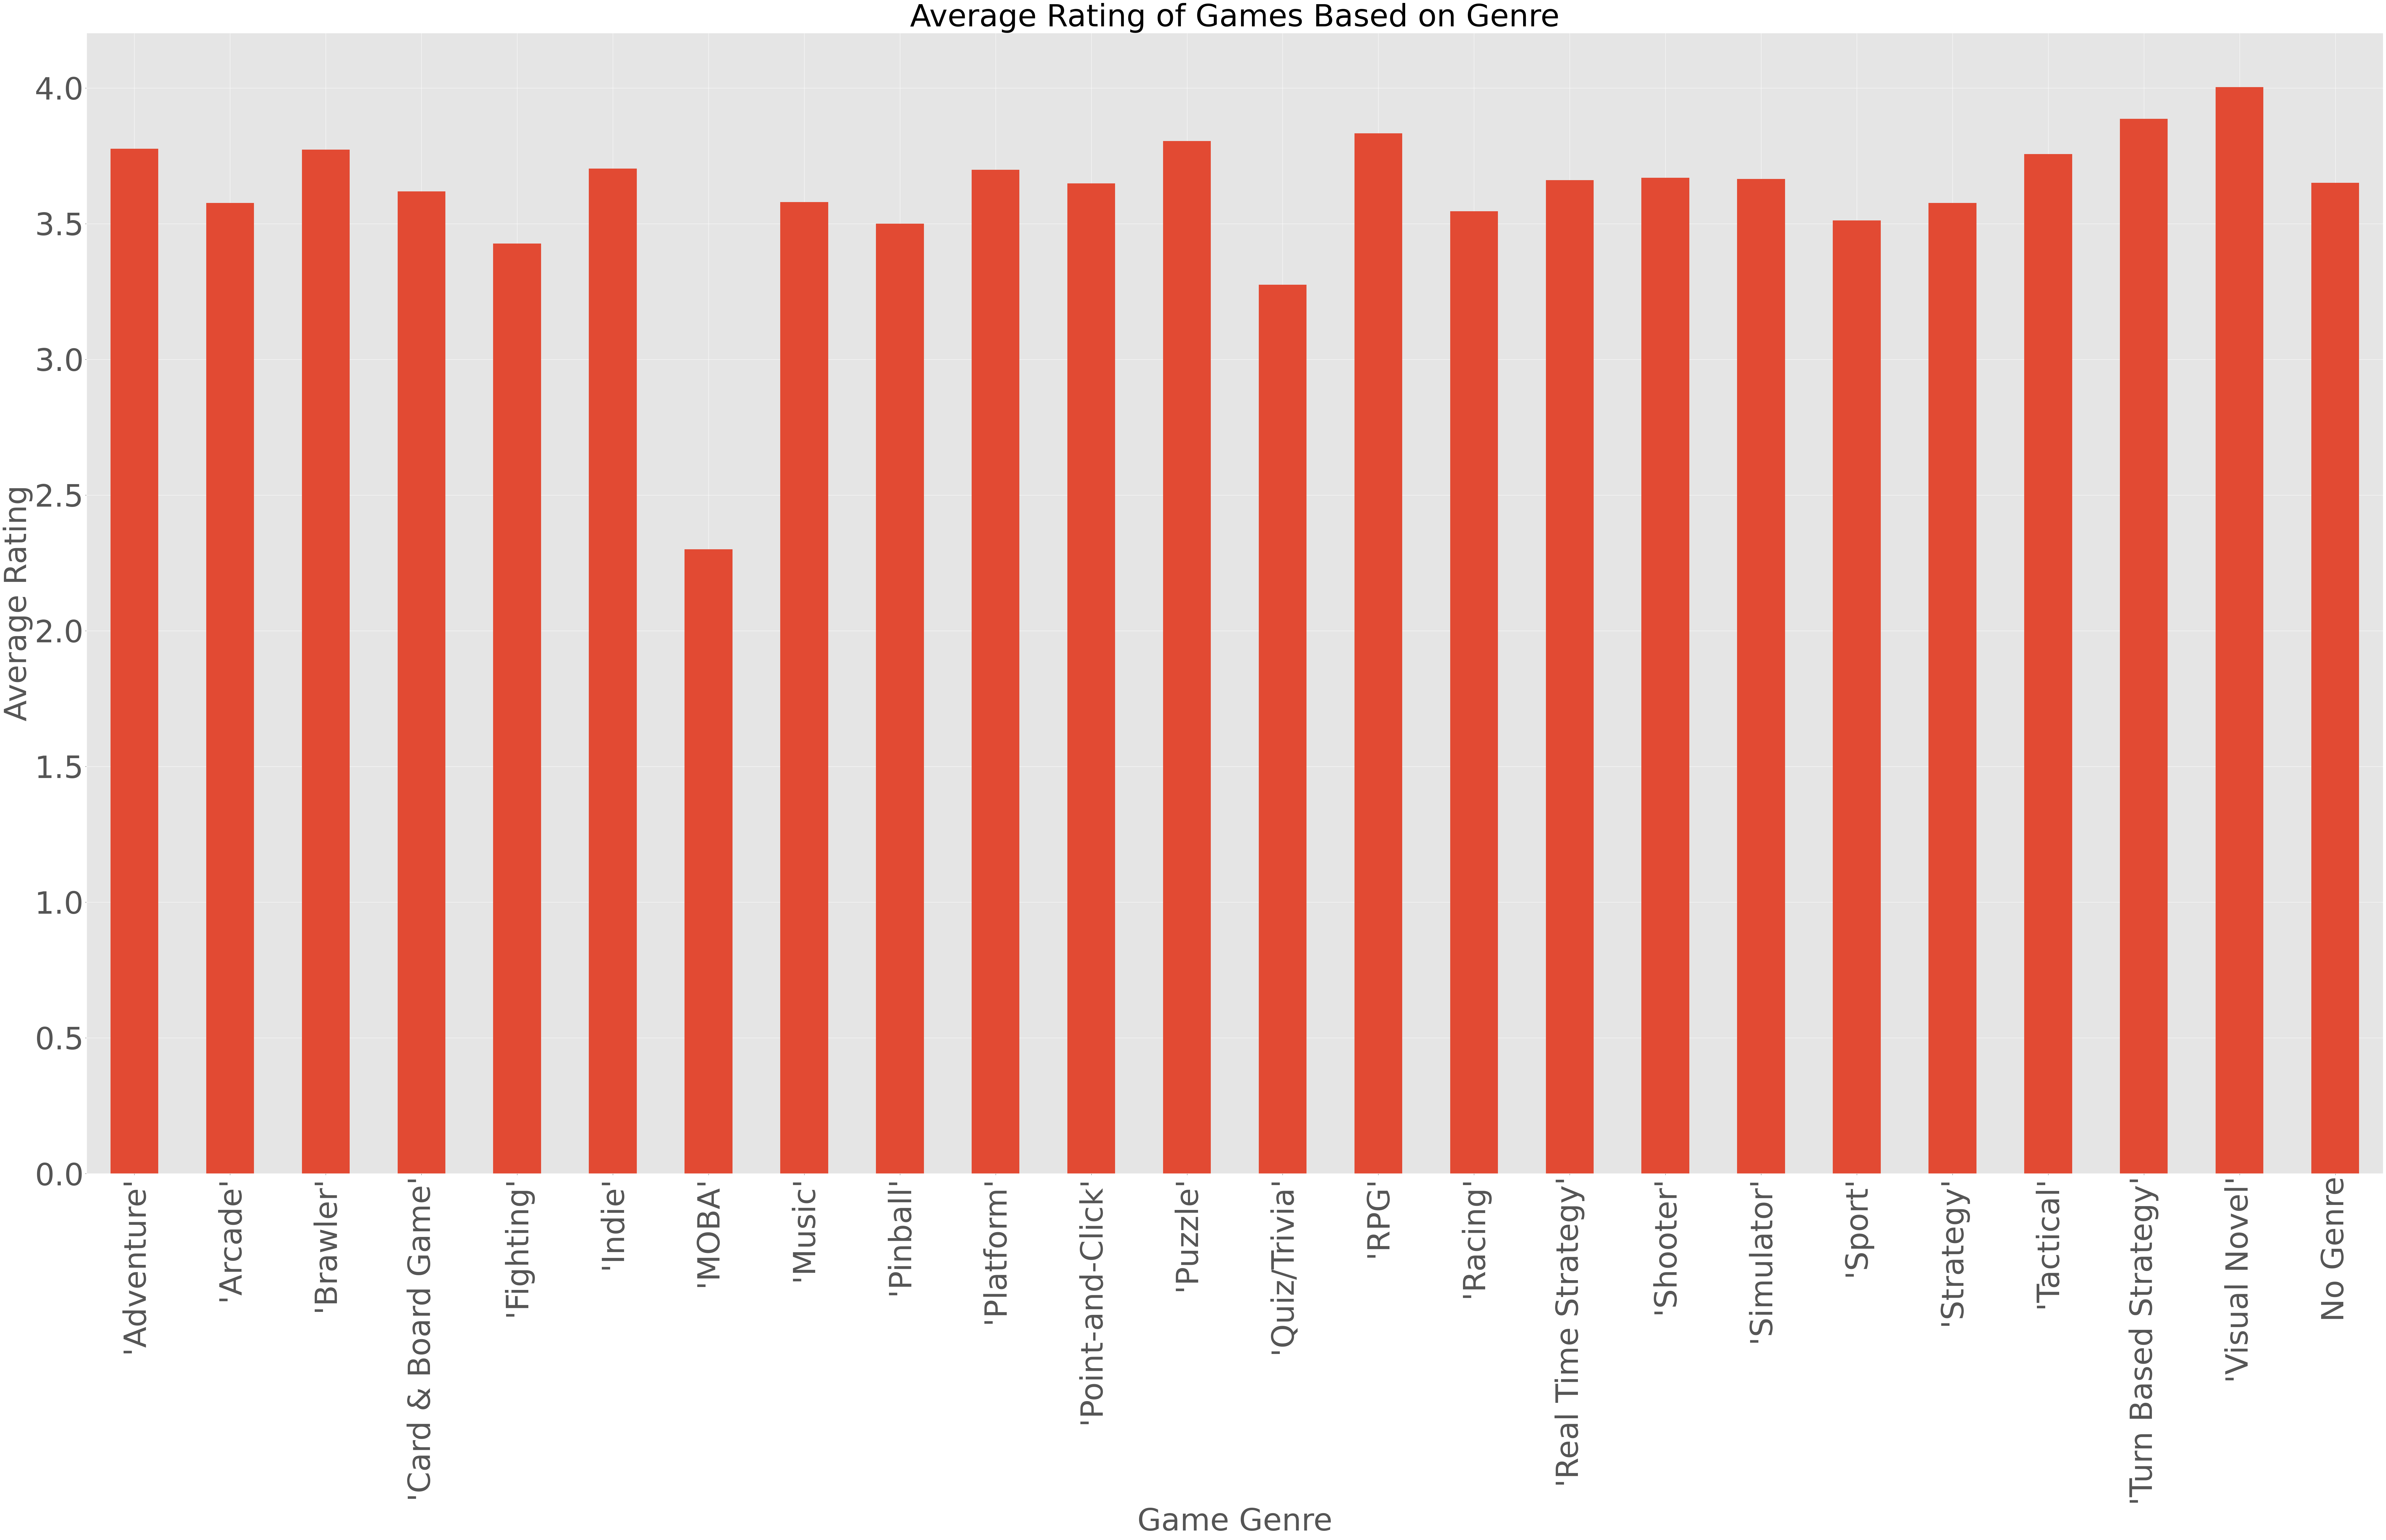

In [58]:

data['Genres'] = data['Genres'].str.strip('[]').str.split(',')
data['Plays'] = data['Plays'].str.strip('K').astype(float)
genre_exploded = data.explode('Genres')
genre_exploded['Genres'] = genre_exploded['Genres'].str.strip()
genre_exploded['Genres'] = genre_exploded['Genres'].replace([''], 'No Genre')
correlation1 = genre_exploded.groupby(['Genres']).Rating.mean()
plt.rc('xtick', labelsize=75,) 
plt.rc('ytick', labelsize=75)   
plt.figure(figsize=(100,50))
correlation1.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel ("Average Rating", fontsize = 75)
plt.xlabel ("Game Genre", fontsize = 75)
plt.title ("Average Rating of Games Based on Genre", fontsize = 75)



Text(0.5, 1.0, 'Number of Plays of Games Based on Genre')

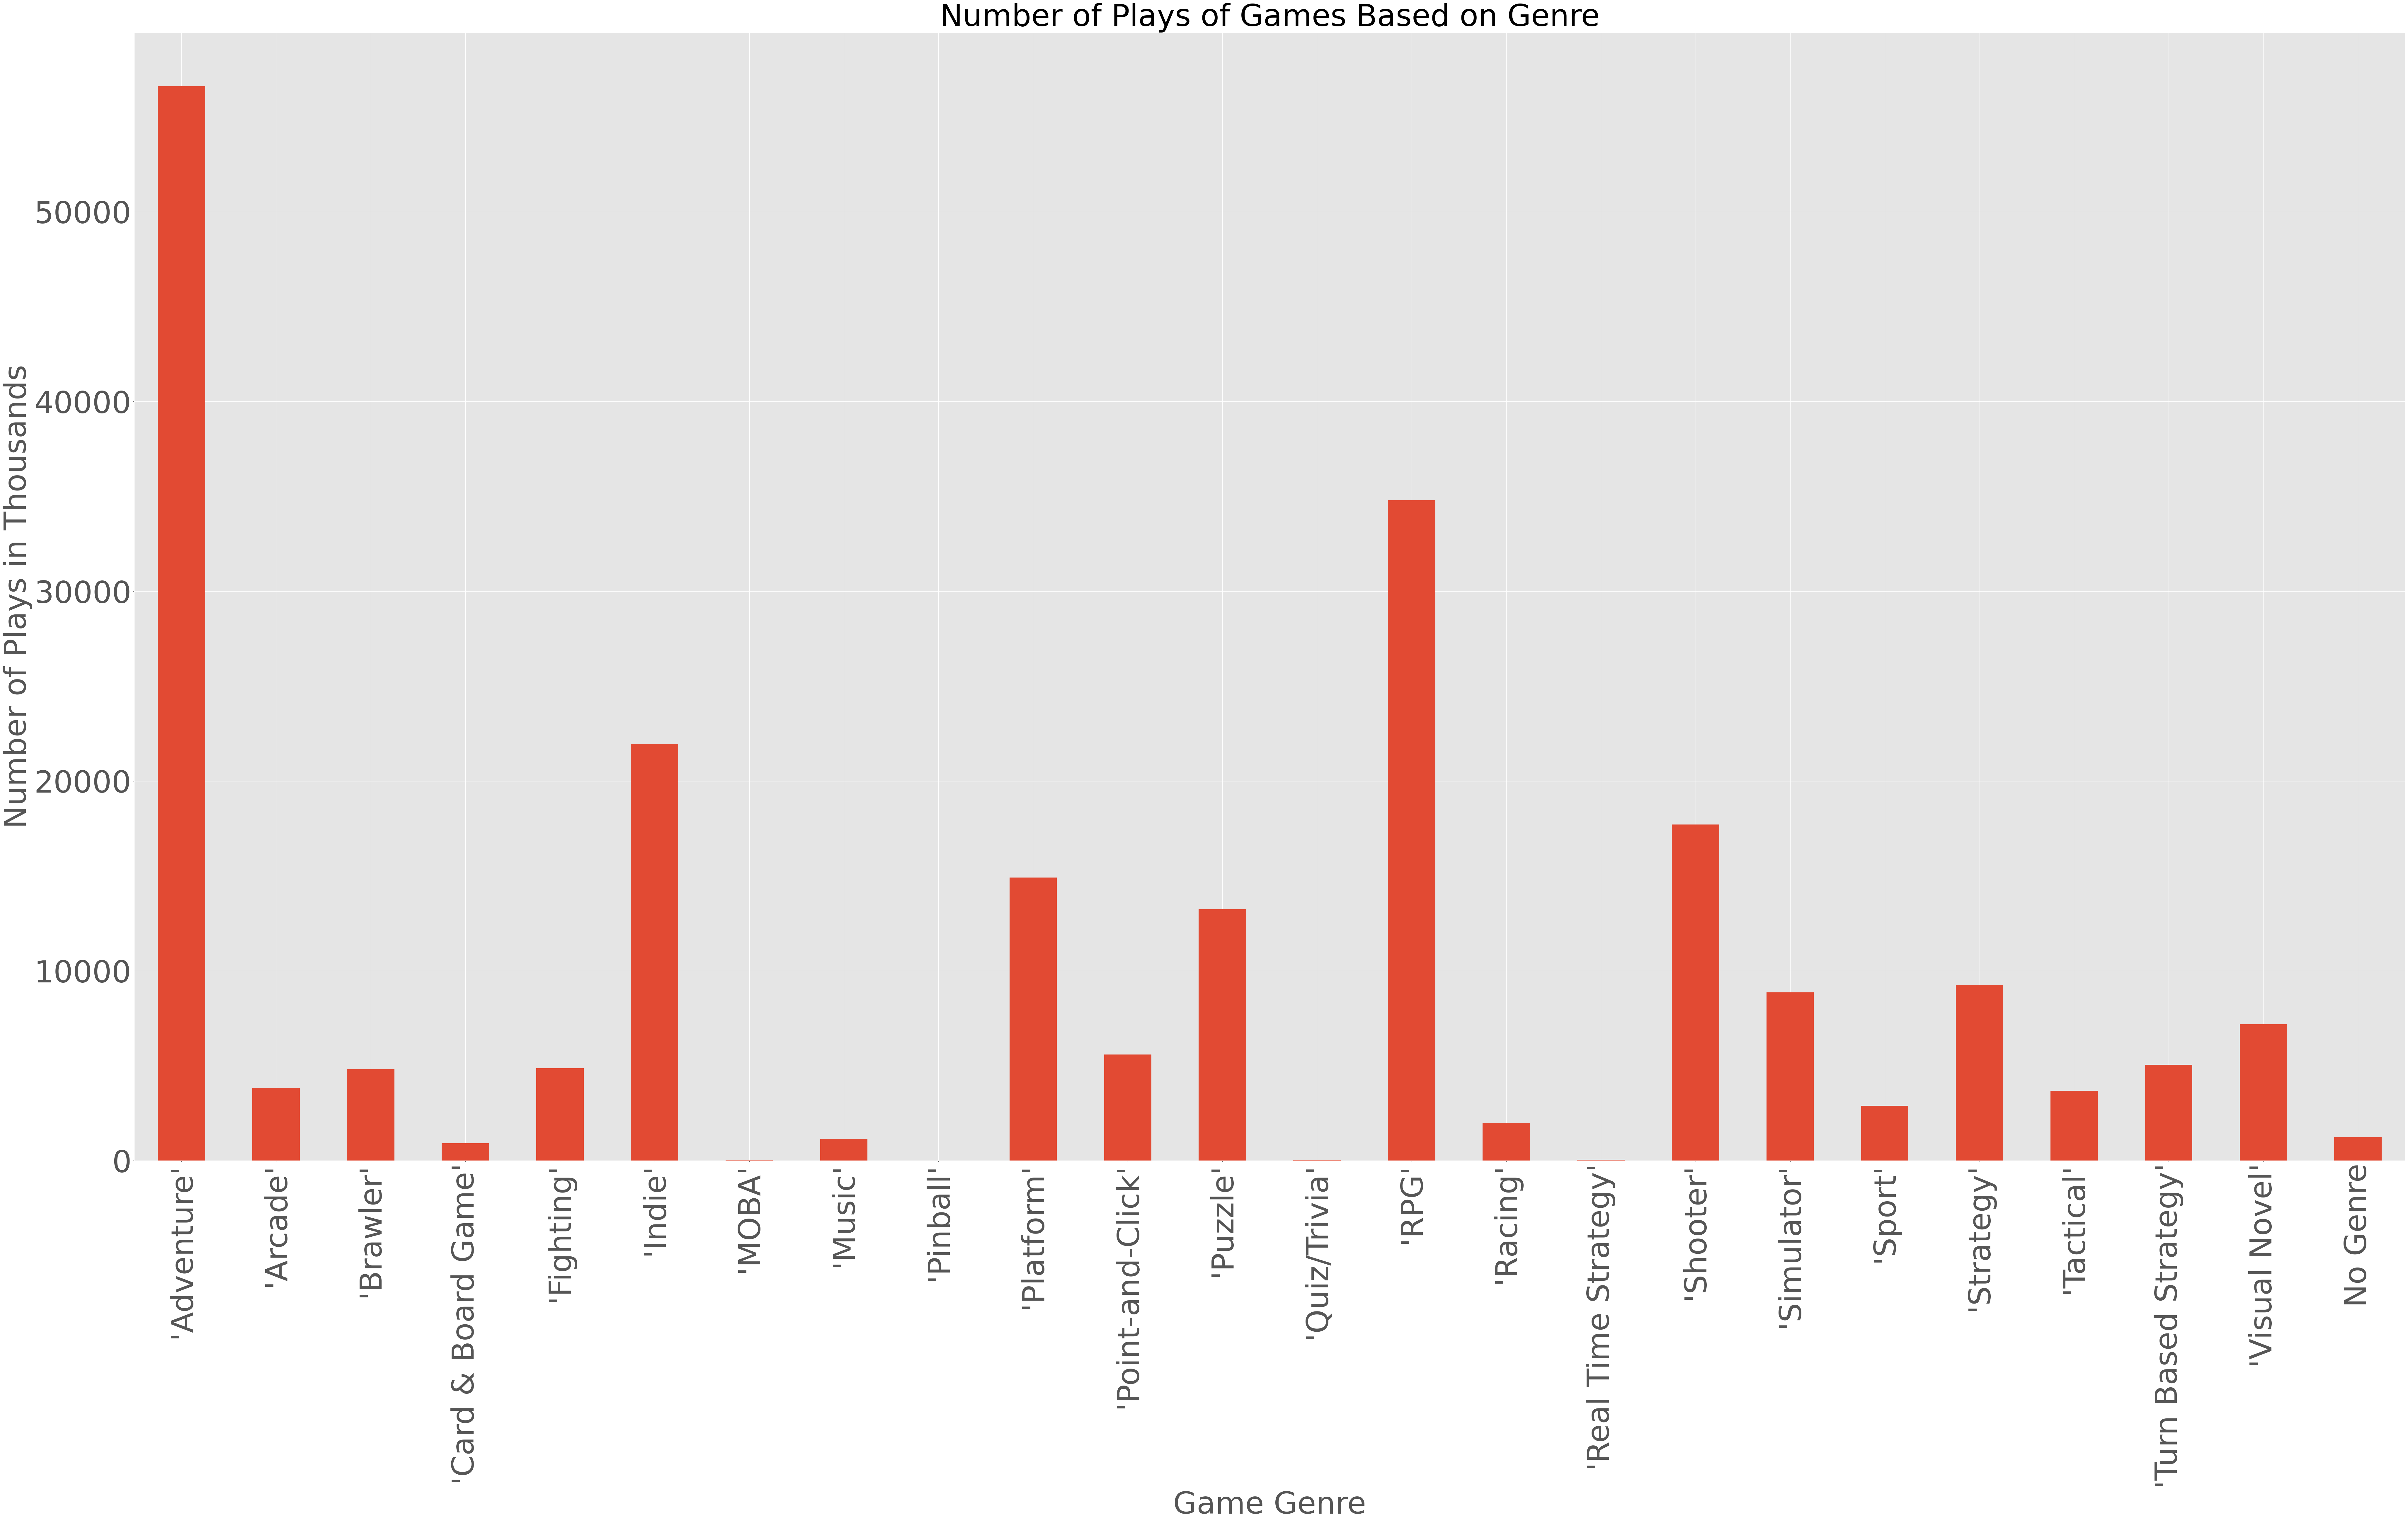

In [59]:
correlation2 = genre_exploded.groupby(['Genres']).Plays.sum()
plt.rc('xtick', labelsize=75,) 
plt.rc('ytick', labelsize=75)   
plt.figure(figsize=(100,50))
correlation2.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel ("Number of Plays in Thousands", fontsize = 75)
plt.xlabel ("Game Genre", fontsize = 75)
plt.title ("Number of Plays of Games Based on Genre", fontsize = 75)